In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
! tail -n +4 -q age_pred/semi_scenario_age_pred_* > age_pred/scenario_semi.txt

In [4]:
with open("age_pred/scenario_semi.txt","r") as f:
    results = f.read()

results = results.split('\n')
import re

results = [re.sub('[\[\]]', '', x) for x in results]
results = [re.sub('baseline', 'baseline_0', x) for x in results]
results = [re.sub('lgb_embeds: ', '', x) for x in results]
results = [re.sub('.pickle', '_0', x) for x in results]
results = [re.sub("\s\s+" , " ", x.replace('scores: ', '')).split(' ') for x in results][:-1]

results = [('_'.join(x[0].split('_')[:-1]), int(x[0].split('_')[-1]), *tuple(float(a) for a in x[-5:])) for x in results]
results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
for i in range(3):
    results.Amount = np.where(results.Amount==0, results.Amount[1:].tolist()+[0], results.Amount)

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


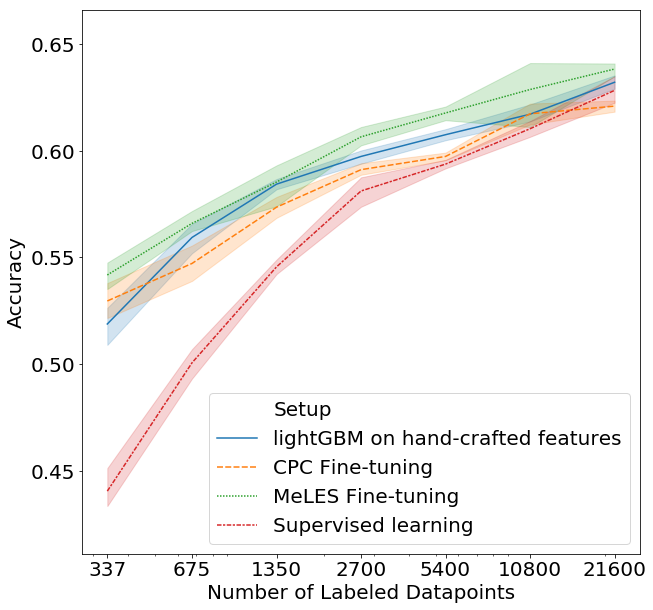

In [5]:
results_melted = results[[(x in set(['lgb_baseline','finetuning_scores', 'finetuning_cpc_scores','target_scores'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'Accuracy', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'finetuning_scores': 'MeLES Fine-tuning',
    'finetuning_cpc_scores': 'CPC Fine-tuning',
    'target_scores': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="Accuracy",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')

    vmin, vmax = results.iloc[:,2:].values.min(), results.iloc[:,2:].values.max()
    ax.set(ylim=(vmin-0.02, vmax+0.02))
    ax.set_facecolor('white')

    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('final_figures/ss_age_pred.pdf', format='pdf', bbox_inches='tight')

In [6]:
! touch gender/scenario_semi.txt
! tail -n +4 -q gender/semi_scenario_gender_* > gender/scenario_semi.txt

In [7]:
with open("gender/scenario_semi.txt","r") as f:
    results = f.read()

results = results.split('\n')
import re

results = [re.sub('[\[\]]', '', x) for x in results]
results = [re.sub('baseline', 'baseline_0', x) for x in results]
results = [re.sub('lgb_embeds: ', '', x) for x in results]
results = [re.sub('.pickle', '_0', x) for x in results]
results = [re.sub("\s\s+" , " ", x.replace('scores: ', '')).split(' ') for x in results][:-1]

results = [('_'.join(x[0].split('_')[:-1]), int(x[0].split('_')[-1]), *tuple(float(a) for a in x[-5:])) for x in results]
results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
for i in range(3):
    results.Amount = np.where(results.Amount==0, results.Amount[1:].tolist()+[0], results.Amount)

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


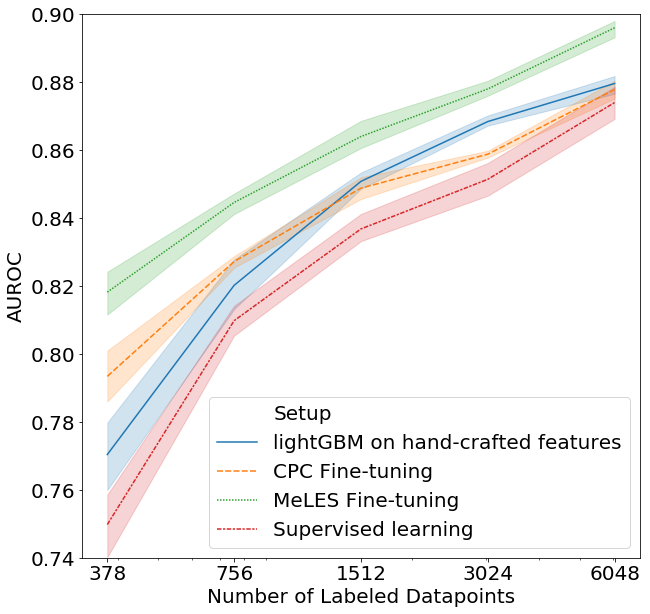

In [8]:
results_melted = results[[(x in set(['lgb_baseline','finetuning_scores', 'finetuning_cpc_scores','target_scores'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'AUROC', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'finetuning_scores': 'MeLES Fine-tuning',
    'finetuning_cpc_scores': 'CPC Fine-tuning',
    'target_scores': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="AUROC",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')

    vmin, vmax = results.iloc[:,2:].values.min(), results.iloc[:,2:].values.max()
    ax.set(ylim=(0.74, 0.9))
    ax.set_facecolor('white')

    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('final_figures/ss_gender.pdf', format='pdf', bbox_inches='tight')

In [9]:
! tail -n +4 -q bowl2019/semi_scenario_bowl2019_* > bowl2019/scenario_semi.txt

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


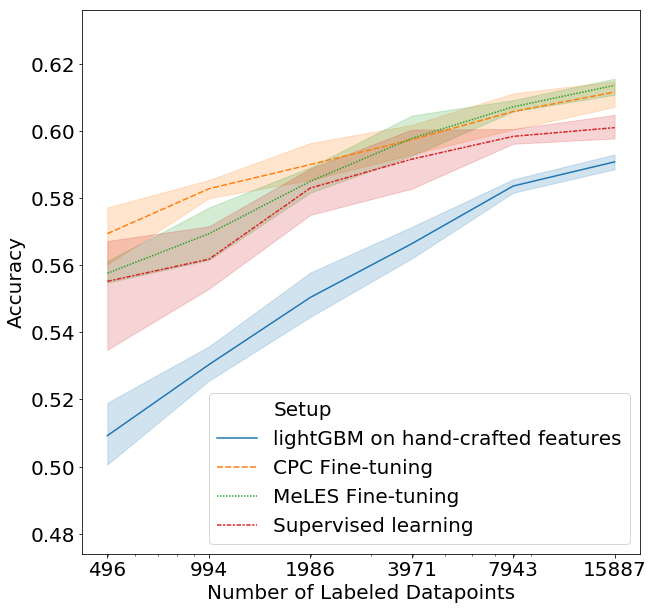

In [10]:
with open("bowl2019/scenario_semi.txt","r") as f:
    results = f.read()

results = results.split('\n')
import re

results = [re.sub('[\[\]]', '', x) for x in results]
results = [re.sub('baseline', 'baseline_0', x) for x in results]
results = [re.sub('lgb_embeds', 'lgb_embeds_0', x) for x in results]
results = [re.sub("\s\s+" , " ", x.replace('scores: ', '')).split(' ') for x in results][:-1]

results = [('_'.join(x[0].split('_')[:-1]), int(x[0].split('_')[-1]), *tuple(float(a) for a in x[-5:])) for x in results]
results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
for i in range(3):
    results.Amount = np.where(results.Amount==0, results.Amount[1:].tolist()+[0], results.Amount)
    
results_melted = results[[(x in set(['lgb_baseline','mles_finetuning_scores', 'cpc_finetuning_scores','target_scores'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'Accuracy', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'mles_finetuning_scores': 'MeLES Fine-tuning',
    'cpc_finetuning_scores': 'CPC Fine-tuning',
    'target_scores': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="Accuracy",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')

    vmin, vmax = results.iloc[:,2:].values.min(), results.iloc[:,2:].values.max()
    
    ax.set(ylim=(vmin-0.02, vmax+0.02))
    ax.set_facecolor('white')

    x_ticks = results_melted['Amount'].unique()
    plt.xticks(x_ticks,(str(x) for x in x_ticks))
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('final_figures/ss_assessment.pdf', format='pdf', bbox_inches='tight')

In [18]:
! tail -n +4 -q X5/semi_scenario_x5_* > X5/scenario_semi.txt

/Users/nikitaovsov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


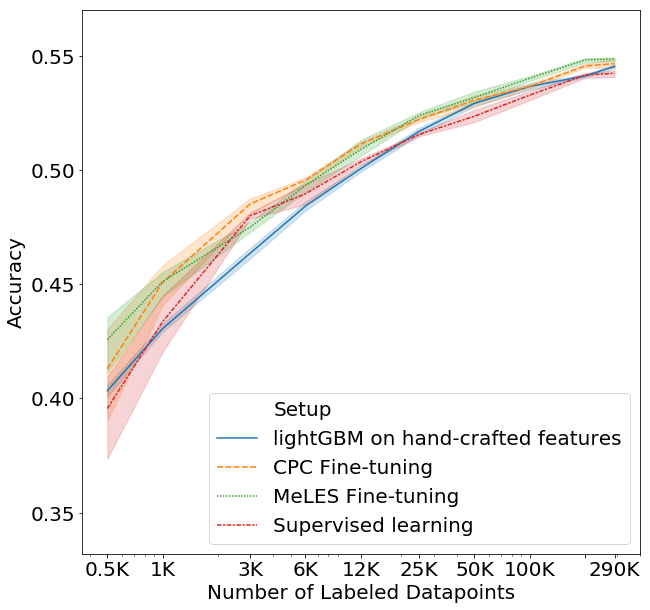

In [19]:
with open("X5/scenario_semi.txt","r") as f:
    results = f.read()

results = results.split('\n')
import re

results = [re.sub('[\[\]]', '', x) for x in results]
results = [re.sub('baseline', 'baseline_0', x) for x in results]
results = [re.sub('lgb_embeds', 'lgb_embeds_0', x) for x in results]
results = [re.sub("\s\s+" , " ", x.replace('scores: ', '')).split(' ') for x in results][:-1]

results = [('_'.join(x[0].split('_')[:-1]), int(x[0].split('_')[-1]), *tuple(float(a) for a in x[-5:])) for x in results]
results = pd.DataFrame(results, columns = ['Name', 'Amount', 'test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
for i in range(3):
    results.Amount = np.where(results.Amount==0, results.Amount[1:].tolist()+[0], results.Amount)
    
results_melted = results[[(x in set(['lgb_baseline','mles_finetuning_scores', 'cpc_finetuning_scores','target_scores'])) for x in results['Name']]] \
    .melt(id_vars=['Name','Amount'], value_vars=['test_V1', 'test_V2', 'test_V3', 'test_V4', 'test_V5'])
results_melted.rename(columns={'value':'Accuracy', 'Name':'Setup'}, inplace=True)

results_melted['Setup'] = results_melted['Setup'].map({
    'lgb_baseline': 'lightGBM on hand-crafted features',
    'mles_finetuning_scores': 'MeLES Fine-tuning',
    'cpc_finetuning_scores': 'CPC Fine-tuning',
    'target_scores': 'Supervised learning '
})

with mpl.rc_context() as rc:
    mpl.rc("figure", figsize=(10,10))
    mpl.rc('font', size=20)
    ax = sns.lineplot(
        x="Amount",
        y="Accuracy",
        data=results_melted,
        hue='Setup',
        style='Setup',
        legend='full',
    )
    
    ax.set_xlabel('Number of Labeled Datapoints')
    ax.set_xscale('log')
    
    vmin, vmax = results.iloc[:,2:].values.min(), results.iloc[:,2:].values.max()
    
    ax.set(ylim=(vmin-0.02, vmax+0.02))
    ax.set_facecolor('white')

    x_ticks = sorted(results_melted.Amount.unique())
    plt.xticks(x_ticks,['0.5K'] + [str(x//1000)+r'K' if x!=2*10**5 else '' for x in x_ticks[1:]])
    #plt.grid(color='white')
    
    mpl.pyplot.savefig('final_figures/ss_x5.pdf', format='pdf', bbox_inches='tight')